### Kaylynn Mosier
### 19 January 2024

In [1]:
# This section of code is used to download files and python script from ThinkStats
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
# Imports required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import thinkplot
import thinkstats2

In [3]:
# Reads file and saves it as apple_data
apple_data = pd.read_csv(r"C:\Users\kayly\OneDrive\Desktop\MSDS\DSC530\Final Project\apple_quality.csv")
apple_data

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                           

In [4]:
# Drops all na values before any calculations
apple_data = apple_data.dropna()

# Confrims all na values were dropped 
apple_data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

## Defining Variables

1) **A_id-** Unique identifier for each fruit: categorical

2) **Size-** Size of the fruit: numerical

3) **Weight-** Weight of the fruit: numerical

4) **Sweetness-** Sweetness of the fruit: numerical

5) **Crunchiness-** Crunchiness of the fruit: numerical

6) **Juciness-** Juciness of the fruit: numerical

7) **Ripeness-** Ripeness of the fruit: numerical

8) **Acidity-** Acidity of the fruit: numerical

9) **Quality-** Overall quality of the fuit: categorical

## Descriptive statistics for each variable

In [5]:
apple_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


The above table lists mean, standard deviation, min, max, and percentiles for 25%, 50%, and 75%. The 50% is the median. The 25% and 75% precentiles will later be accessed to remove outliers. Mode and tails will be outlined by looking at histograms of each variable. The spread of a variable can be found by subtracting the max from the min value. 

After outliers are removed, I will recalculate the descriptive statistics.

## Variable Histograms & Boxplots

### Size

In [8]:
# Function that calculates and plots histogram
def MakeHistogram(data):
    # Plots histogram with bins set at 60
    plt.hist(data, bins=60, color='grey')
    
    # Labels x and y axis and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    
    # Prints plot
    plt.show()

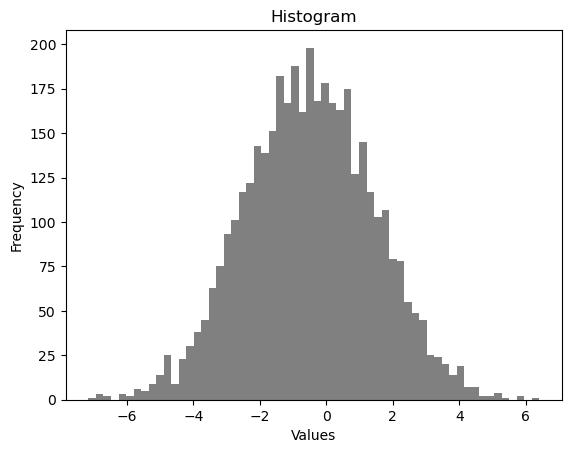

In [9]:
# In this case, we pass apple_data.Size as data to plot only the Size column
MakeHistogram(apple_data.Size)

The histogram implies this variable has a normal distribution. The mode is just below 0. There may be slightly longer tails on the left side of the histogram indicating a slight left skew.

{'whiskers': [<matplotlib.lines.Line2D at 0x26c74c948d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26c7550afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c74cef490>],
 'medians': [<matplotlib.lines.Line2D at 0x26c75510590>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c74c08f90>],
 'means': []}

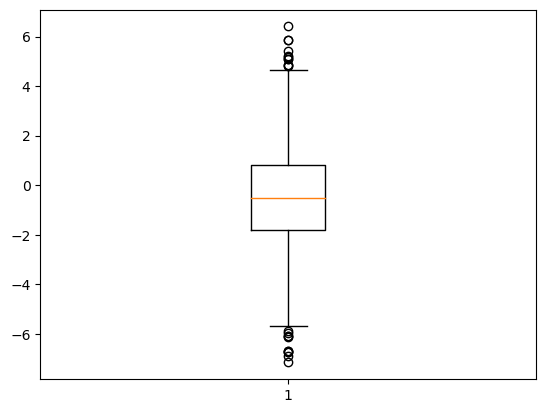

In [10]:
# Plotting size boxplot
plt.boxplot(apple_data.Size)

In boxplots outliers are shown as dots outside the wiskers. The wiskers mark the lower end of the first interquartile range and the upper end of the third interquartile range.

The boxplots reveals there may be outliers on the lower and upper end of this variable. The below section of code will find and remove these outliers.

### Weight

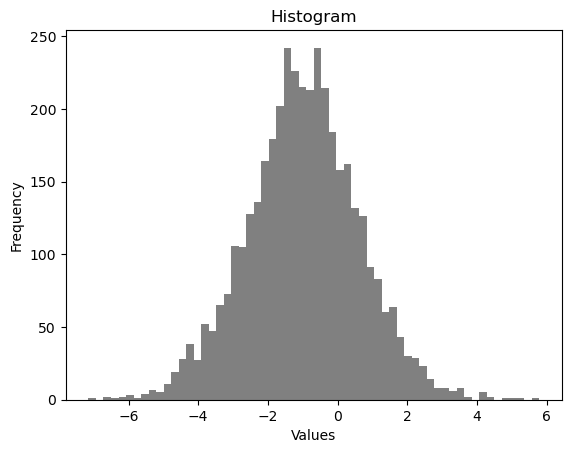

In [12]:
MakeHistogram(apple_data.Weight)

The histogram of this varaible reveals a mostly normal distribution. There are two values for the mode, and 0 and around -1.75. There does not appear to be skew in this variable.

{'whiskers': [<matplotlib.lines.Line2D at 0x26c74d309d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26c74d32d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c74d31fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x26c74d855d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c74d86f10>],
 'means': []}

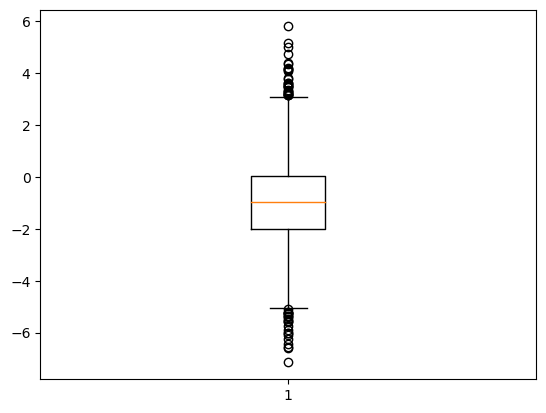

In [13]:
# Plotting weight boxplot
plt.boxplot(apple_data.Weight)

This variable also has outliers. They may need to be removed in the data cleaning step.

### Sweetness

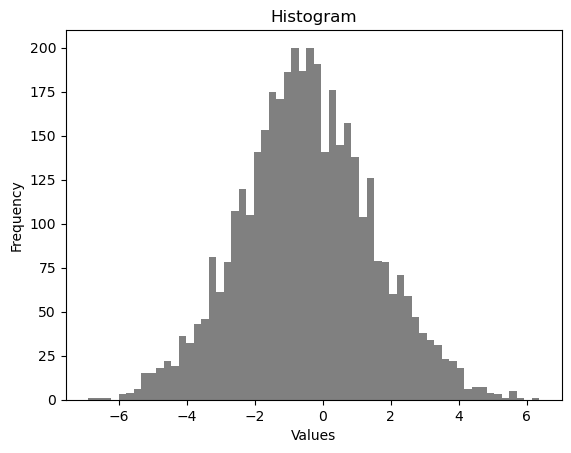

In [15]:
MakeHistogram(apple_data.Sweetness)

The histogram of this variable indicates a normal distribution. There are two modes in this dataset, around -0.25 and around -1.0 There does not appear to be skew in this variable.

{'whiskers': [<matplotlib.lines.Line2D at 0x26c75549010>,
 'caps': [<matplotlib.lines.Line2D at 0x26c75548f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c74c22b10>],
 'medians': [<matplotlib.lines.Line2D at 0x26c74c10a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c74c11a90>],
 'means': []}

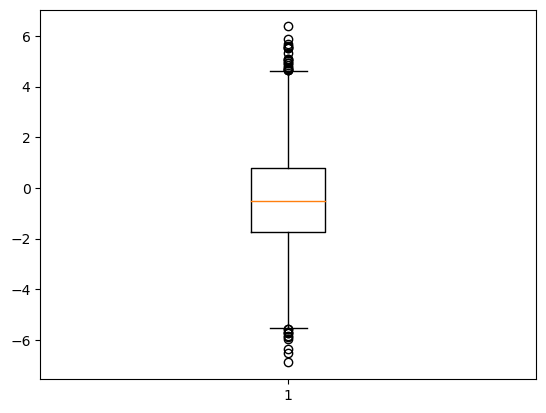

In [16]:
# Plotting sweetness boxplot
plt.boxplot(apple_data.Sweetness)

This variable also has outliers that may need to be removed in the data cleaning step.

### Crunchiness

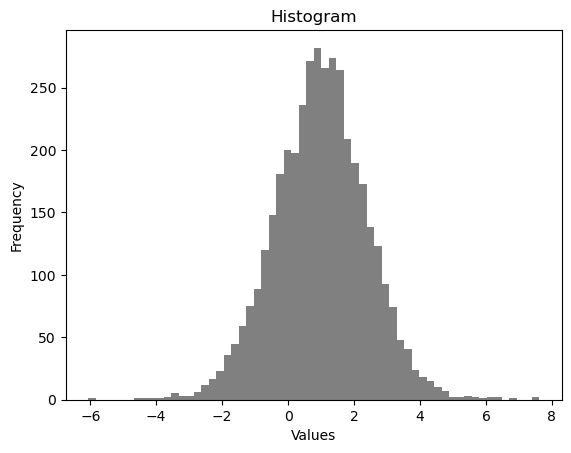

In [18]:
MakeHistogram(apple_data.Crunchiness)

According to the histogram, this variable also has a normal distribution. The mode is at about 0.75. The tail might be a little longer on the right side indicating a slight right skew. 

{'whiskers': [<matplotlib.lines.Line2D at 0x26c756e5e50>,
 'caps': [<matplotlib.lines.Line2D at 0x26c756e75d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c75629e10>],
 'medians': [<matplotlib.lines.Line2D at 0x26c756f0cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c756f1710>],
 'means': []}

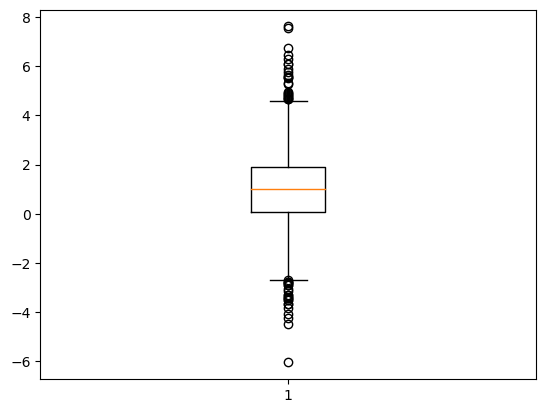

In [19]:
# Plotting crunchiness boxplot
plt.boxplot(apple_data.Crunchiness)

There are outliers in this dataset that may need to be removed during the data cleaning step.

### Juiciness

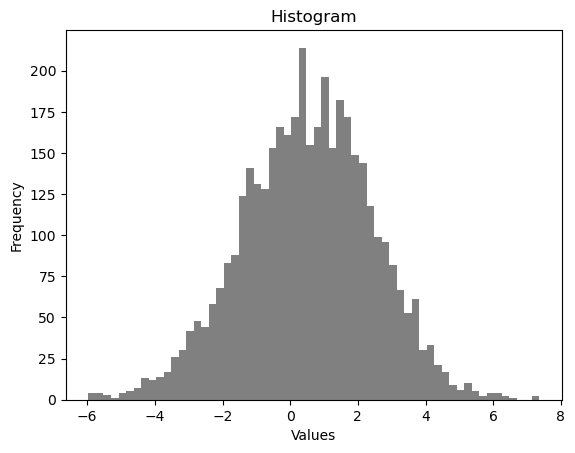

In [21]:
MakeHistogram(apple_data.Juiciness)

The histogram of this variable indicates a normal distribution. The mode is slighly above 0. The left side of the histogram seems a little heavier indicating a left skew. 

{'whiskers': [<matplotlib.lines.Line2D at 0x26c756352d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26c758bea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c7588ab10>],
 'medians': [<matplotlib.lines.Line2D at 0x26c758c0190>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c75772d50>],
 'means': []}

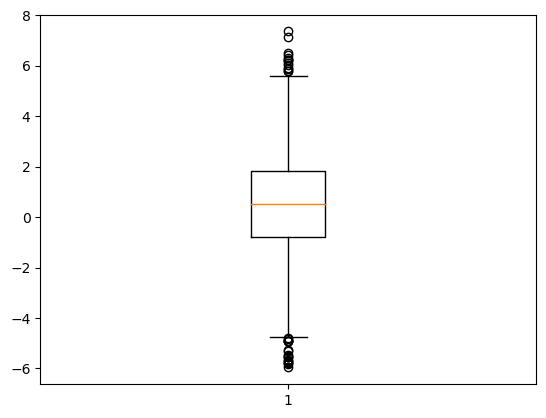

In [22]:
# Plotting juiciness boxplot
plt.boxplot(apple_data.Juiciness)

This variable also has outliers that may need to be removed during the data cleaning step.

### Ripeness

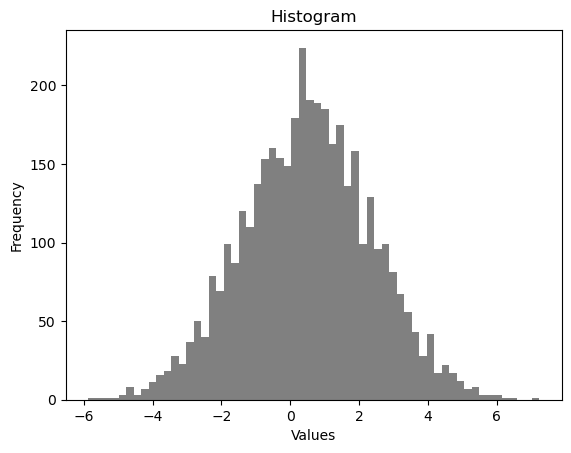

In [24]:
MakeHistogram(apple_data.Ripeness)

The histogram of this variable indicate a normal distribution. The mode is slightly above 0. There does not appear to be skew.

{'whiskers': [<matplotlib.lines.Line2D at 0x26c7598cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x26c7598e550>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c7598c490>],
 'medians': [<matplotlib.lines.Line2D at 0x26c7598fbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c755a4f10>],
 'means': []}

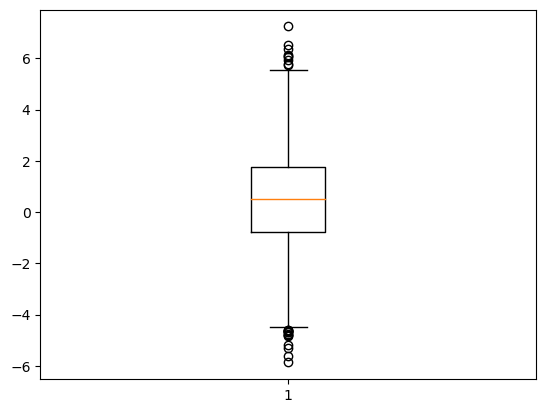

In [25]:
# Plotting ripeness boxplot
plt.boxplot(apple_data.Ripeness)

This variable also has outliers that may need to be removed during the data cleaning step. 

### Acidity

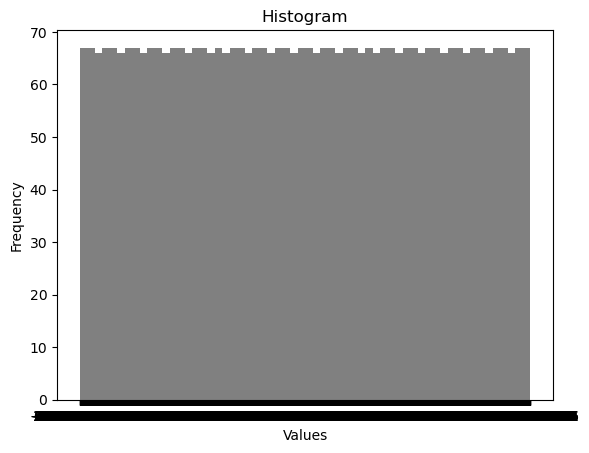

In [27]:
MakeHistogram(apple_data.Acidity)

There appears to be something wrong with the acidity data.This problem needs to be fixed before further evaluation.

In [28]:
# Shows data types stored in each column
apple_data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

Examining data types reveals that acidity is stored as an object. I will need to change this to a float to do further evaluation.

In [29]:
# Attempts to change acidity data type from object to numeric
apple_data['Acidity'] = pd.to_numeric(apple_data['Acidity'])
apple_data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

The acidity column has successfully been tranformed to a float object

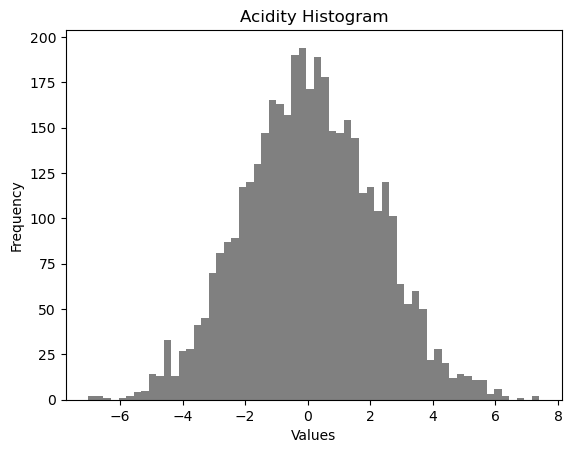

In [31]:
# Plotting acidity histogram after tranformation to float object
plt.hist(apple_data.Acidity, bins=60, color='grey')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Acidity Histogram')
plt.show()

The histogram indicates a mostly normal distribution. The mode is around -0.75. There might be a slight right skew.

{'whiskers': [<matplotlib.lines.Line2D at 0x26c778f9c50>,
 'caps': [<matplotlib.lines.Line2D at 0x26c74ddc850>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c77ba5310>],
 'medians': [<matplotlib.lines.Line2D at 0x26c775cbb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c77a2e850>],
 'means': []}

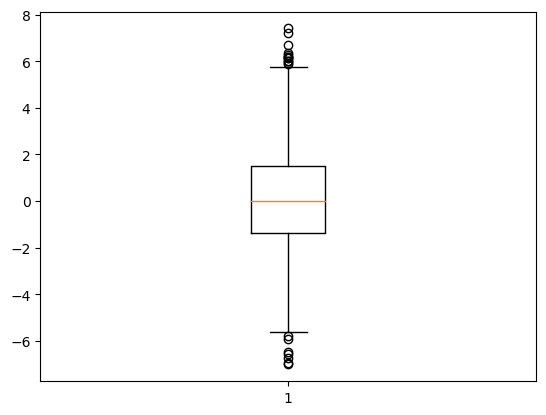

In [32]:
# Plotting acidity boxplot
plt.boxplot(apple_data.Acidity)

This variable also has outliers that may need to be removed during the data cleaning step. 

## Remove Outliers

In [33]:
# Finds outliers in each column and removes them from apple_data
# .difference excludes A_id and Quality columns from outlier removal
for column in apple_data.columns.difference(['A_id','Quality']):
    # Finds Q1 and Q3 using information in describe function
    Q1=apple_data.describe()[column]['25%']
    Q3=apple_data.describe()[column]['75%']
    
    # Calculates inter-quartile range and limits for outliers
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    # Removes outliers from dataframe
    apple_data=apple_data[((apple_data[column]>=lower_limit) & (apple_data[column]<=upper_limit))]
apple_data

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
0 

In [34]:
# Confirms all NAs are dropped before running descriptive statistic calculations
apple_data = apple_data.dropna(ignore_index=True)
apple_data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [35]:
apple_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000,3783.000000
mean,1997.725615,-0.511154,-0.986246,-0.479688,0.984772,0.502573,0.529642,0.059686
std,1156.183645,1.850895,1.493747,1.868820,1.296976,1.849108,1.803806,2.046417
min,1.000000,-5.692093,-4.991516,-5.484367,-2.620954,-4.667150,-4.471210,-5.634195
25%,994.500000,-1.796901,-1.967051,-1.724301,0.094582,-0.792918,-0.706866,-1.372741
50%,1984.000000,-0.514302,-0.979013,-0.506153,0.995256,0.509874,0.528669,0.016585
75%,3005.500000,0.769038,0.010163,0.776843,1.871555,1.788377,1.771178,1.463969
max,3999.000000,4.524772,3.043317,4.521894,4.591936,5.598023,5.548138,5.685253


Descriptor table confirms removal of outliers. Count of responses has dropped from 4000 to 3758.

## CDF of Variables

In [77]:
# Function that creates CDF
def MakeCDF(data, label):
    # Sorts data
    x = np.sort(data)
    # Calculates CDF
    y = 1 * np.arange(len(data)) / (len(data) - 1)
    
    # Plots CDF and adds chart elements
    plt.plot(x,y, label=label)
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.title('CDF')
    plt.legend()

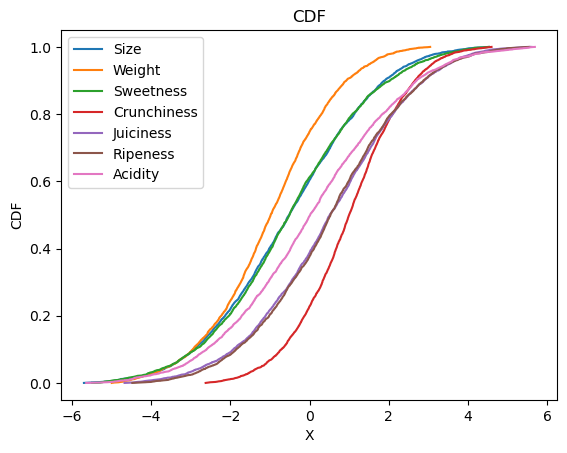

In [82]:
# Plots CDF of each variable by calling MakeCDF function for each variable
size_cdf = MakeCDF(apple_data.Size, label='Size')
weight_cdf = MakeCDF(apple_data.Weight, label='Weight')
sweetness_cdf = MakeCDF(apple_data.Sweetness, label='Sweetness')
crunchiness_cdf = MakeCDF(apple_data.Crunchiness, label='Crunchiness')
juiciness_cdf = MakeCDF(apple_data.Juiciness, label='Juiciness')
ripeness_cdf = MakeCDF(apple_data.Ripeness, label='Ripeness')
acidity_cdf = MakeCDF(apple_data.Acidity, label='Acidity')

For all varaibles, the CDF is normal so we expect a normal distribution. At an X value of 0, weight has the highest probability while crunchiness has the lowest. These CDFs can give us the probability of any value of a variable happening. For example, we could examine the graph to find the probability of sweetness being 0 (in this case there is a 60% chance the value of sweetness is at or below 0). 

## Compare two scenarios using PMF

In [36]:
# Importing seaborn library
import seaborn as sns

In [37]:
# Separating juiciness and quality into a separate data frame
juiciness_quality_df = apple_data.filter(items=['Juiciness', 'Quality'])
print(juiciness_quality_df)

      Juiciness Quality
0      0.853286    good
1      2.838636     bad
2      3.637970    good
3      3.030874    good
4     -3.853071     bad
...         ...     ...
3778   1.697986     bad
3779   0.024523    good
3780   2.199709     bad
3781   2.161435    good
3782   1.266677    good

[3783 rows x 2 columns]


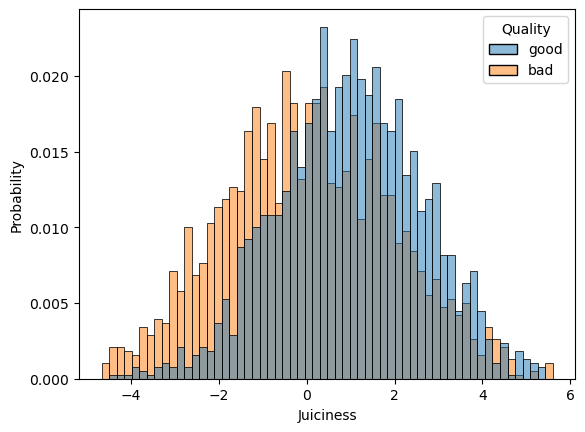

In [38]:
# Plots PMF of juiciness separated by good and bad quality ratings using seaborn library
juiciness_pmf = sns.histplot(juiciness_quality_df, x='Juiciness', hue='Quality', stat='probability', bins=60)

This PMF reveals that apples with a good quality rating have a higher average value for juiciness. This may indicate that juiciness is an important attribute of apples because the quality rating is changed if juiciness is changed.

## Analytical Distribution

According to the CDF and histogram previous plotted, juiciness has a normal distribution. This means plotting these values as a normal distribuion is approptiate.

The mean and standard deviation are needed to make this calculation. The mean was previously found to be 0.498148 after outlier removal. The standard deviation is calculated below.

In [39]:
# Calculated standard deviation using numpy
sigma = np.std(apple_data.Juiciness)
print(sigma)

1.8488637113936903


In [40]:
mu = apple_data.describe()['Juiciness']['mean']
print(mu)

0.502573314134285


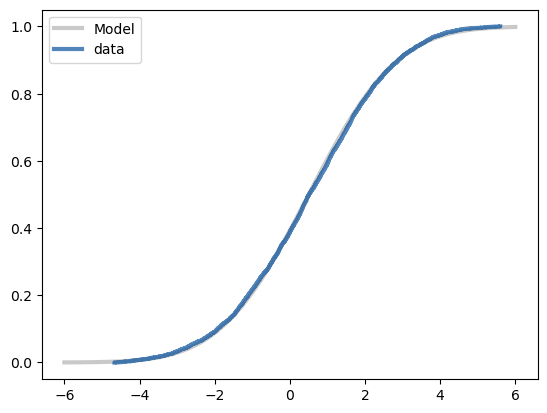

In [41]:
# Calculates normal CDF
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=-6, high=6)
# Plots normal CDF
thinkplot.Plot(xs, ps, label='Model', color='0.7')
# Calculates CDF of data
cdf = thinkstats2.Cdf(apple_data.Juiciness, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
# Adds legend to graph
thinkplot.Config()

The plot shows a comparison of a normal probability plot and CDF of juiciness. Because both graphs line up, it is appropriate to say juiciness has a normal probability. 

## Scatter Plots

In [42]:
# Filter data to remove A_id and Quality columns
# These columns will not provide useful values for correlation calculation
correlation_data = apple_data.filter(items=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'])
print(correlation_data)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
1    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
2    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
3     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
4    -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
...        ...       ...        ...          ...        ...       ...   
3778  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3779 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3780 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3781 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3782  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  
0    -0.722809  
1     2.621636  
2     0.790723  
3     0.501984  
4    -2.981523  
...        ...  
3778

Text(0.5, 1.0, 'Sweetness vs Size')

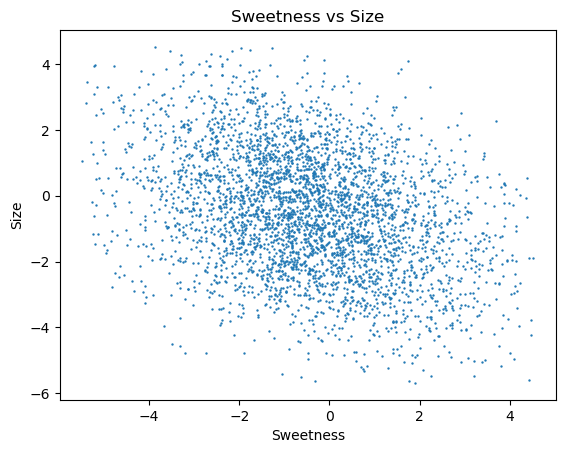

In [43]:
# Plots scatter plot of sweetness vs size using pandas
sweetness_size_plot = apple_data.plot.scatter(x='Sweetness', y='Size', s =0.50)
# Sets title of plot
sweetness_size_plot.set_title('Sweetness vs Size')

Viewing this scatter plot shows there is a slight negative relationship between size and sweetness. As values of size increase, values of sweetness decrease. 

In [44]:
# Use numpy to calculate covariance between Sweettness and Size
np.cov(apple_data.Sweetness, apple_data.Size)

array([[ 3.492489  , -1.15949866],
       [-1.15949866,  3.42581056]])

We cannot conclude that one realtionship has a higher covariance than the other because we do not know for sure that the units are the same. The only conclusions we can draw about covariance are from the signs of the covariance value. A positive covariance indicates the variables vary in the same way while a negative covariance indicates an inverse relationship between variables. 

The above covariance matrix reveals the covariane between sweetness and size variables is -1.16. A negative covariance indicates that as one variable increases, the other decreases. This confirms information gained from the scatterplot.

Text(0.5, 1.0, 'Juiciness vs Acidity')

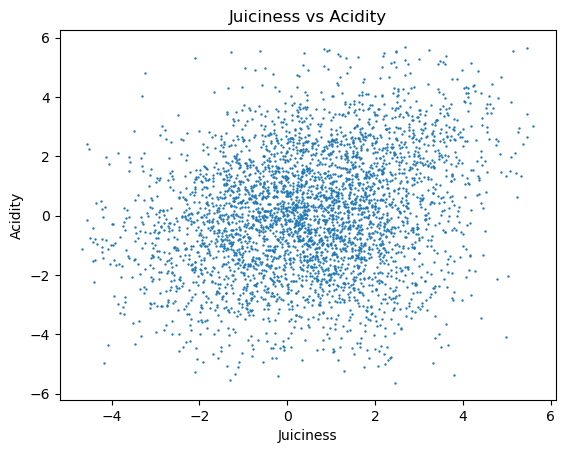

In [45]:
# Plot scatter plot of juiciness vs crunchiness using pandas
juiciness_crunchiness_plot = apple_data.plot.scatter(x='Juiciness', y='Acidity', s=0.5)
# Sets title of plot
juiciness_crunchiness_plot.set_title('Juiciness vs Acidity')

Looking at this scatter plot reveals a slight positive relationship between the variables. As values for juiciness increases, values for acidity increase.. 

In [46]:
# Use numpy to calculate covariance between juiciness and crunchiness
np.cov(apple_data.Juiciness, apple_data.Acidity)

array([[3.41920086, 0.9139688 ],
       [0.9139688 , 4.18782311]])

The covariance matrix reveals the covarriance between juiciness and crunchiness is 0.91. The positive signs confirms what was revealed in the scatterplot; as one variable increases, the other also increases.

In [47]:
# Calculation Pearsons's correlation coefficient of variables
correlation_data.corr()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.149273,-0.335213,0.171205,-0.022944,-0.157779,0.178811
Weight,-0.149273,1.000000,-0.138046,-0.092999,-0.090886,-0.231921,0.038090
Sweetness,-0.335213,-0.138046,1.000000,-0.025264,0.083084,-0.274849,0.066674
Crunchiness,0.171205,-0.092999,-0.025264,1.000000,-0.228547,-0.194538,0.073844
Juiciness,-0.022944,-0.090886,0.083084,-0.228547,1.000000,-0.101278,0.241532
Ripeness,-0.157779,-0.231921,-0.274849,-0.194538,-0.101278,1.000000,-0.200160
Acidity,0.178811,0.038090,0.066674,0.073844,0.241532,-0.200160,1.000000


According to the correlation table, none of the variables have a very strong relationship. The strongest relationship (although it is still a quite weak relationship) is between sweetness and size. There are also mild relationships in the following pairs:
* Sweetness & ripeness
* Juiciness & crunchiness
* Juiciness & acidity
* Weight & Ripeness

Because all values of correlation are so low, I will also check for non-linear relationships. Pearson's correlation coefficient has the assumes the data has a linear relationship. Spearman's rank correlation does not have this assumptoin and may highlight these non-linear relationships. 

In [48]:
from scipy.stats import spearmanr

# Calculates Spearman's correlation between sweetness and size
rho, p = spearmanr(apple_data['Sweetness'], apple_data['Size'])
print("Spearman's Correlation:", rho, 'P-Value:', p)

Spearman's Correlation: -0.3185380480141681 P-Value: 5.827617033232756e-90


The Pearsons's correlation for sweetness and size was -0.34. The spearman's correlation is -0.32. There was actually a decrease in correlation when using the Spearman's correlation calcualtion indicating this is likely a weak linear relationship.

In [49]:
# Calculates Spearman's correlation between juiciness and acidity 
rho, p = spearmanr(apple_data['Juiciness'], apple_data['Acidity'])
print("Spearman's Correlation:", rho, 'P-Value:', p)

Spearman's Correlation: 0.22477029313809066 P-Value: 1.5657620851854866e-44


The Pearson's correlation for juiciness and acidity is 0.24. The Spearman's correlation is 0.22. Just like in the previous example, there was a decrease in correlation when using the Spearman's correlation indicating this is likely a weak linear relationship. 

## Hypothesis Test

Hypothesis: There is a difference in means between Juiciness values with a good quality rating and bad quality rating. 

Null Hypothesis: There is no difference in means between juiciness values with a good quality rating and a bad quality rating. 

In [50]:
# Class inherited from thinkstats2
class HypothesisTest(object):

    # Takes data and saves it as data variable
    # Calles MakeModel and TestStatistic
    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        
    # Calculates Pvalue
    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [51]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    
    # Calculates test statistic as absolute value mean of group 1 minus mean of group 2
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    # Makes model
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    # Runs model by randomly shuffling the groups
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [52]:
# Saves data as two groups, juiciness with good quality rating and juiciness with bad quality rating
data = apple_data.Juiciness[apple_data.Quality=='good'], apple_data.Juiciness[apple_data.Quality=='bad']

In [53]:
# Calls DiffMeansPermute which calcuates the Pvalue by shuffling the data
ht = DiffMeansPermute(data)
pvalue = ht.PValue()

print('P-Value:', pvalue)

P-Value: 0.0


A p-value of 0.0 indicates there is strong reason to reject the null hypothesis. We have strong support there is a statistical difference between the means of each group.

In [54]:
np.mean(apple_data.Juiciness[apple_data.Quality=='good'])

0.9769928661995696

In [55]:
np.mean(apple_data.Juiciness[apple_data.Quality=='bad'])

0.04418144963877341

## Regression Analysis

We saw previously that there is a small correlation between juicinesss and acidity. We also saw a slight correlation between juiciness and crunchiness. With this insight, it is reasonable to assume acidity and crunchiness values may help predict values for juiciness.

In [56]:
import statsmodels.formula.api as smf

In [57]:
# Performs ordinary least squares calculation with juiciness as the outcome variable and crunchiness as predictor variable
model_1 = smf.ols('Juiciness ~ Crunchiness', data=apple_data)
# Fits model
results = model_1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Juiciness   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           5.08e-46
Time:                        19:43:37   Log-Likelihood:                -7591.3
No. Observations:                3783   AIC:                         1.519e+04
Df Residuals:                    3781   BIC:                         1.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8235      0.037     22.404      0.000       0.751       0.896
Crunchiness    -0.3258      0.023    -14.435      0.000      -0.370      -0.282
==============================================================================
Omnibus:                       28.018   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.023
Skew:                          -0.054   Prob(JB):                     4.49e-05
Kurtosis:                       2.661   Cond. No.                         2.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squard values from this table tels us crunchiness can predict 5.2% of variability in juiciness. The p-values for this model are <0.05 indicating this model is statistically significant. Additionally, the f-statistic is large with a significant p-value indicating crunchinesss is a significantly better predictor of juiciness than a model with no predictors. 

In [58]:
# Performs ordinary least squares calculation with juiciness as the outcome variable and acidity as predictor variable
model_2 = smf.ols('Juiciness ~ Acidity', data=apple_data)
# Fits model
results = model_2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Juiciness   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           2.38e-51
Time:                        19:43:56   Log-Likelihood:                -7579.1
No. Observations:                3783   AIC:                         1.516e+04
Df Residuals:                    3781   BIC:                         1.517e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4895      0.029     16.771      0.000       0.432       0.547
Acidity        0.2182      0.014     15.305      0.000       0.190       0.246
==============================================================================
Omnibus:                       31.101   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.011
Skew:                          -0.106   Prob(JB):                     6.11e-06
Kurtosis:                       2.672   Cond. No.                         2.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the R-squared value, when used as the only predictor variable, acidity can predict 5.8% of variablity in juiciness. This value is significant because the P-value is <0.05. Additionally, the f-statistic is large and has a significant p-value (<0.05) indicating this model is a better predictor of juiciness than a model with no predictors.

In [59]:
# Performs ordinary least squares with juiciness as the dependent/outcome variable
# Crunchiness and acidity are the independent/predictor variables
model_3 = smf.ols('Juiciness ~ Crunchiness + Acidity', data=apple_data)
results = model_3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Juiciness   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     256.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          4.52e-105
Time:                        19:44:01   Log-Likelihood:                -7452.3
No. Observations:                3783   AIC:                         1.491e+04
Df Residuals:                    3780   BIC:                         1.493e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8364      0.035     23.598      0.000       0.767       0.906
Crunchiness    -0.3532      0.022    -16.186      0.000      -0.396      -0.310
Acidity         0.2348      0.014     16.976      0.000       0.208       0.262
==============================================================================
Omnibus:                       14.445   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.187
Skew:                          -0.021   Prob(JB):                      0.00372
Kurtosis:                       2.737   Cond. No.                         2.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Accoriding to adjusted R-squared value provided in the results summary, crunchiness and acidity account for 11.8% of variation in juiciness. P-values of <0.05 for both variables indicate these results are statistically significant. The f-statistic is large with a significant p-value indicating this model is better at predicting juiciness than a model with no predictors.

The first two models of simple regression can independently account for 10.9% of the variation in juiciness. Applying both predictors to a multiple regression increasess this value to 11.9%. In this instance, a multiple regression analysis is more appropriate to predict juiciness.

## Summary

When I began this analysis, I set out to discover if size, weight, sweetness, crunchiness, juiciness, ripeness, or acidity had an effect on quality rating. After this EDA, I have discovered that juiciness does have an effect on quality rating. 

Plotting of juiciness histogram in the beginning stages of my EDA suggested that juiciness has a normal distribution. Plotting an analytical distribution of the CDF of juiciness and standard normal CDF confirms a normal distribution. The PMF showed a difference of means in juiciness ratings of apples with a good quality rating versus a bad quality rating. A hypothesis test confirmed the difference in means by rejecting the null hypothesis that there was not difference in means between the two groups. Additionally, scatterplots and correlation tables indicated acidity and crunchiness may be good predictors of juiciness. Analysis of a multiple regression model using ordinary least squares confirmed acidity and crunchiness are good predictors of juiciness.

Due to the scope of this project, I chose to focus mainly on juiciness. I think the other variables likely have an effect on quality rating. I may have missed other important interactions due to my focus on juiciness. 

Another variable that may have been helpful is color of the apple. Often different colors of apples have different properties. For example, green apples are usually more sour than other apples. If someone eats a green apple, they expect it to be sour. A green apple that is not sour would likely have a bad quality rating. Including this variable may have helped to better predict quality rating. 

The original data did not have units. I assumed all data had already been normalized when I began my EDA. This assumption may be false and could lead to incorrect conclusions.

Througout this semester, I have struggled to use the ThinkStats library. When beginning this project, I was torn on if I should use the library or not. I ened up deciding to do my own reseach when I could and avoid the ThinkStats library. It was a struggle to find the required libraries and write the code on my own. However, I feel like I have gained so much from this project. I feel more confident in my abilities to write Python code, understand complex statistics, and research convoluted topics on my own.

One note about my dataset. It may seem like an unconventional choice, who cares about properties of apples? I actually work on the sensory team for a large food company. A huge part of my job is training a panel of people to recognize specific flavor and texture attributes of different meats. This group takes an analyitcal approach to food tasting. For example, they will taste a hot dog and rank it on a 15 point scale for saltiness. This dataset called to me because it seemed like a real world application of the data we collect from this panel. 